***Problem Statement***



My goal is to classify leaf images into predefined categories based on their nutritional deficiencies using deep learning models.

***Approach***

**Dataset**: Use the CoLeafDATASET which contains images of leaves categorized into various nutritional deficiencies.

**Models:** Implement and compare ResNet50 and EfficientNet models for image classification.

**Evaluation:** Assess models based on accuracy, training time, and model complexity.

***Data preprocessing steps***


I have collected the data from mendely's site the link is given below.

***link:***  https://data.mendeley.com/datasets/brfgw46wzb/1

The dataset contains 1006 leaf images grouped according to their nutritional deficiencies. The main directory of the dataset holds 10 different classes which are - Boron, Iron, Potasium, Calcium, Magnesium, Manganese, Nitrogen and others. And, each difeerent classes containing image datasets based on their nutritional deficiencies.

CoLeaf dataset contain images that facilitate training and validation during the utilization of deep learning algorithms for coffee plant leaf nutritional deficiencies recognition and classification.

In [1]:
!pip install tensorflow keras
!pip install tensorflow_addons
!pip install efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.2 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import efficientnet.tfkeras as efn
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import os
from PIL import Image

# Path to the main directory in Google Drive
main_dir = '/content/drive/MyDrive/CoLeafDATASET/CoLeafDATASET'

# List of subfolders representing different categories
subfolders = ['boron-B', 'calcium-ca', 'healthy', 'iron-fe', 'magnesium-mg', 'manganese-mn', 'more-deficiencies', 'nitrogen-N', 'phosphorus-P', 'potasium-K']

# Loop through each subfolder
for subfolder in subfolders:
    subfolder_path = os.path.join(main_dir, subfolder)

    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Loop through each image file in the subfolder
        for file_name in os.listdir(subfolder_path):
            if file_name.endswith(".jpg") or file_name.endswith(".png"):
                # Read the image
                image_path = os.path.join(subfolder_path, file_name)
                image = Image.open(image_path)

                # Now you can perform operations on the image
                # For example, display it or perform some processing
                # image.show()  # Uncomment to display the image

                # Close the image after processing
                image.close()

In [11]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    main_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    main_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 815 images belonging to 10 classes.
Found 199 images belonging to 10 classes.


***Model Architecture:***

**ResNet50:** A deep convolutional neural network with residual connections to prevent the vanishing gradient problem. which is Suitable for deep learning tasks with complex image data due to its deep architecture and residual learning framework.


**EfficientNet:** A model that scales the depth, width, and resolution of the network efficiently.Provides a balance between accuracy and computational efficiency.

***Training process, including any hyperparameter tuning***



**** Defining ResNET50***

In [12]:


resnet50_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)
resnet50_model.trainable = False

resnet50 = models.Sequential([
    resnet50_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

resnet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

*** Defining efefcientNet***

In [13]:
efficientnet_model = efn.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)
efficientnet_model.trainable = False

efficientnet = models.Sequential([
    efficientnet_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

efficientnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Training Methods :**

 I will use Resnet50 and effecientNet for training methods with **10 Epochs** which I think will help to improve it's performance. By increasing it to 25 may have give much better result.

In [14]:
# Training ResNet50
history_resnet50 = resnet50.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
26/26 [==============================] - 325s 12s/step - loss: 2.2263 - accuracy: 0.2074 - val_loss: 2.1576 - val_accuracy: 0.2211
Epoch 2/10
26/26 [==============================] - 321s 12s/step - loss: 2.0832 - accuracy: 0.2626 - val_loss: 2.0779 - val_accuracy: 0.2513
Epoch 3/10
26/26 [==============================] - 323s 12s/step - loss: 2.0333 - accuracy: 0.2798 - val_loss: 2.0607 - val_accuracy: 0.2663
Epoch 4/10
26/26 [==============================] - 303s 12s/step - loss: 2.0529 - accuracy: 0.2687 - val_loss: 2.0446 - val_accuracy: 0.2714
Epoch 5/10
26/26 [==============================] - 297s 11s/step - loss: 1.9604 - accuracy: 0.3104 - val_loss: 2.0341 - val_accuracy: 0.3216
Epoch 6/10
26/26 [==============================] - 296s 11s/step - loss: 1.9730 - accuracy: 0.3129 - val_loss: 1.9914 - val_accuracy: 0.3166
Epoch 7/10
26/26 [==============================] - 290s 11s/step - loss: 1.9185 - accuracy: 0.3104 - val_loss: 1.9973 - val_accuracy: 0.2563
Epoch 

In [15]:
## Training effecientnet

history_efficientnet = efficientnet.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
26/26 [==============================] - 175s 6s/step - loss: 1.5617 - accuracy: 0.4712 - val_loss: 1.5793 - val_accuracy: 0.4372
Epoch 2/10
26/26 [==============================] - 163s 6s/step - loss: 1.0194 - accuracy: 0.6454 - val_loss: 1.4962 - val_accuracy: 0.4824
Epoch 3/10
26/26 [==============================] - 159s 6s/step - loss: 0.9019 - accuracy: 0.6933 - val_loss: 1.4327 - val_accuracy: 0.5025
Epoch 4/10
26/26 [==============================] - 167s 6s/step - loss: 0.7427 - accuracy: 0.7411 - val_loss: 1.4526 - val_accuracy: 0.5226
Epoch 5/10
26/26 [==============================] - 169s 6s/step - loss: 0.6702 - accuracy: 0.7681 - val_loss: 1.4010 - val_accuracy: 0.5477
Epoch 6/10
26/26 [==============================] - 165s 6s/step - loss: 0.6067 - accuracy: 0.7975 - val_loss: 1.3558 - val_accuracy: 0.5427
Epoch 7/10
26/26 [==============================] - 163s 6s/step - loss: 0.5674 - accuracy: 0.8086 - val_loss: 1.4198 - val_accuracy: 0.5276
Epoch 8/10
26

***Visualiization model evaluation and accurracy by comprative analysis:***

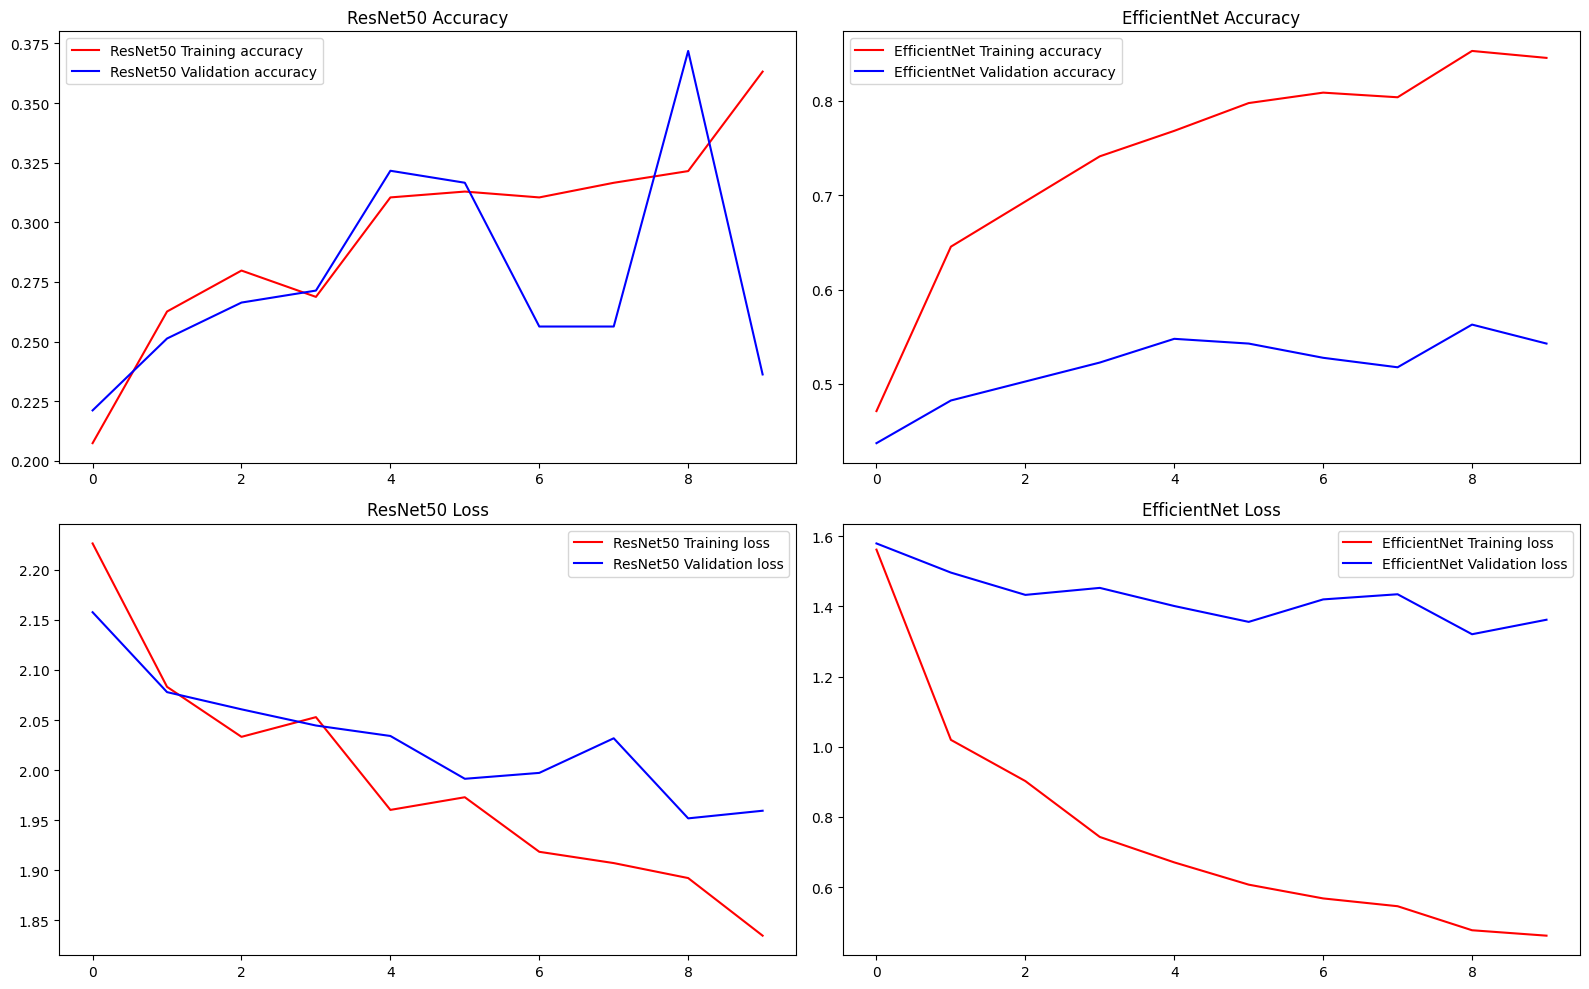

Comparative Analysis:
ResNet50:
  Total Training Time: 3120 seconds
  Final Training Accuracy: 36.32%
  Final Validation Accuracy: 23.62%
  Final Training Loss: 1.8348
  Final Validation Loss: 1.9595

EfficientNet:
  Total Training Time: 1680 seconds
  Final Training Accuracy: 84.54%
  Final Validation Accuracy: 54.27%
  Final Training Loss: 0.4613
  Final Validation Loss: 1.3619


In [17]:
def plot_comparative_analysis(history1, history2, title1, title2, train_time1, train_time2):
    # Extract metrics from histories
    acc1 = history1.history['accuracy']
    val_acc1 = history1.history['val_accuracy']
    loss1 = history1.history['loss']
    val_loss1 = history1.history['val_loss']

    acc2 = history2.history['accuracy']
    val_acc2 = history2.history['val_accuracy']
    loss2 = history2.history['loss']
    val_loss2 = history2.history['val_loss']

    epochs1 = range(len(acc1))
    epochs2 = range(len(acc2))

    # Plotting the accuracy and validation accuracy
    plt.figure(figsize=(16, 10))

    plt.subplot(2, 2, 1)
    plt.plot(epochs1, acc1, 'r', label=f'{title1} Training accuracy')
    plt.plot(epochs1, val_acc1, 'b', label=f'{title1} Validation accuracy')
    plt.title(f'{title1} Accuracy')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(epochs2, acc2, 'r', label=f'{title2} Training accuracy')
    plt.plot(epochs2, val_acc2, 'b', label=f'{title2} Validation accuracy')
    plt.title(f'{title2} Accuracy')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(epochs1, loss1, 'r', label=f'{title1} Training loss')
    plt.plot(epochs1, val_loss1, 'b', label=f'{title1} Validation loss')
    plt.title(f'{title1} Loss')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(epochs2, loss2, 'r', label=f'{title2} Training loss')
    plt.plot(epochs2, val_loss2, 'b', label=f'{title2} Validation loss')
    plt.title(f'{title2} Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print the comparative analysis
    print(f"Comparative Analysis:")
    print(f"{title1}:")
    print(f"  Total Training Time: {train_time1} seconds")

    print(f"  Final Training Accuracy: {acc1[-1]*100:.2f}%")
    print(f"  Final Validation Accuracy: {val_acc1[-1]*100:.2f}%")
    print(f"  Final Training Loss: {loss1[-1]:.4f}")
    print(f"  Final Validation Loss: {val_loss1[-1]:.4f}\n")

    print(f"{title2}:")
    print(f"  Total Training Time: {train_time2} seconds")

    print(f"  Final Training Accuracy: {acc2[-1]*100:.2f}%")
    print(f"  Final Validation Accuracy: {val_acc2[-1]*100:.2f}%")
    print(f"  Final Training Loss: {loss2[-1]:.4f}")
    print(f"  Final Validation Loss: {val_loss2[-1]:.4f}")



plot_comparative_analysis(
    history_resnet50, history_efficientnet,
    "ResNet50", "EfficientNet",
    3120, 1680

)




*** Result Discussion***

 As we can see the ResNet50's trainig time is 52 minutes and effecient net is taking less time which is 28 minutes. And, Since it has been done using google colab note book the render time is not effecient rather by using dedicated GPU the render time could be better.

 However, EffecientNet is giving much better accuracy less training and validation loss than ResNet50. **The final validation accuracy is 36.23% for ResNet50** **And Final validation accuracy for EffecientNet is 54.27%**

***Conclusion***

EfficientNet shows higher accuracy and lower complexity compared to ResNet50, making it more suitable for deployment on resource-constrained devices. However, ResNet50's performance is less than impressive but it might be preferred in scenarios where higher computational resources are available.

***Future Works:***


 **Hyperparameter Tuning :** We can experiment with different hyperparameters like learning rate, batch size, and optimizer.

 **Data Augmentation:** We can implement more sophisticated augmentation techniques (e.g., random rotations, zoom, shear) for expanding the datasets

 **Evaluation Metrics and Techniques:**  We  can implement k-fold cross-validation to better estimate model performance. And, Analyze confusion matrices to understand misclassifications and improve the model.


** Real-World Application and Testing:**  We can deploy models in agricultural settings to test performance in real-world conditions.And, can develop a user-friendly interface or mobile application for farmers to easily use the model.